This project was made by Henrique Araujo 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import pandas as pd 

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The dataframe has a lot of unnamed columns, which makes the dataset a little bit confusing.

There is a need to rename and map some of them to make it more intuitive to whoever looks at this database.

### Cleaning and Mapping Yes/No  columns

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [6]:
#creating a dic 
yes_no = {
    'Yes': True, 
    'No': False,
    'NaN': np.nan
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

Checking if it really worked 

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Apparently everything worked fine.

### Cleaning and Mapping Checkbox Columns

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [9]:
movie_bol = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

#creating a loop to map all the columns above 
for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].map(movie_bol)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
star_wars = star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6',
    
})

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

Everything worked just fine ;)

### Clenning the Ranking Columns 

Now that we have organized the columns in a more intuitive way, let's convert some other columns into numeric type, then rename the columns so that we can tell what they represent more easily.

In [11]:
#converting into numeric 
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#renaming the columns 
star_wars = star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

In [12]:
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


Everything worked fine, on cleaning the ranking the columns.

In [13]:
%matplotlib inline

In [14]:
#Getting the average ranks from each movie
mean_star_wars_rank = star_wars[star_wars.columns[9:15]].mean()
mean_star_wars_rank

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

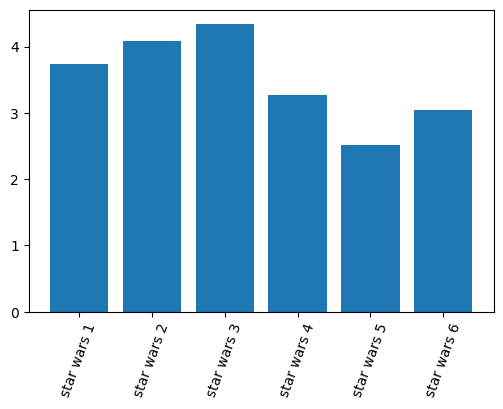

In [15]:
#creating the graph 
plt.bar(range(6), mean_star_wars_rank)
plt.xticks(range(6), ['star wars 1', 'star wars 2', 'star wars 3',
                      'star wars 4', 'star wars 5', 'star wars 6'])

plt.xticks(rotation = 70)
plt.show()
           

According to the fans, star wars 5 is the best star wars movie. Let's create a more intuitive graph sorted from best to worse.


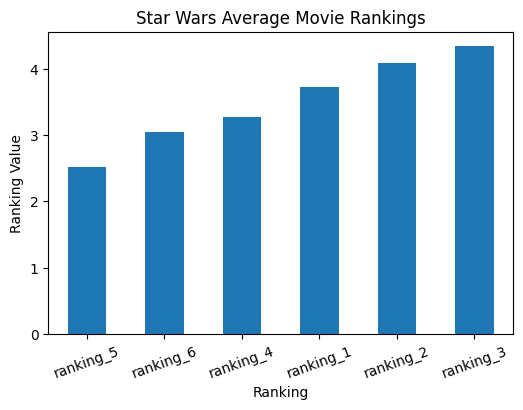

In [16]:
sorted_ranks = mean_star_wars_rank.sort_values()
sorted_ranks.plot.bar(rot=20)
plt.title("Star Wars Average Movie Rankings")
plt.ylabel('Ranking Value')
plt.xlabel('Ranking')
plt.show()

### Finding the Most Viewed Movie 

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1 and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [17]:
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [18]:
seen_star_wars = star_wars[star_wars.columns[3:9]].sum().sort_values()
seen_star_wars

seen_3    550
seen_2    571
seen_4    607
seen_1    673
seen_6    738
seen_5    758
dtype: int64

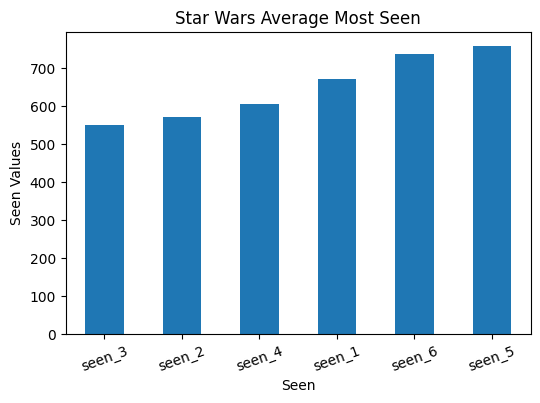

In [19]:
seen_star_wars.plot.bar(rot=20)
plt.title("Star Wars Average Most Seen")
plt.ylabel('Seen Values')
plt.xlabel('Seen')
plt.show()

The most viewed star wars is the one with the best ranking, according to the fans, and the less seen have the worser ranking. They have an inverse relation, the more seemed is the movie, the better rank it gets.
With the exception of 4 and 1.

### Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded.

In [20]:
#separating groups into binary 
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female'] 

In [21]:
#analyzing by segment (ranking)
ranking_m = male[male.columns[9:15]].mean()
ranking_f = female[female.columns[9:15]].mean()

print("Males Average Ranking:\n", ranking_m.sort_values())
print("\nFemales Average Ranking:\n", ranking_f.sort_values())

Males Average Ranking:
 ranking_5    2.458629
ranking_4    2.997636
ranking_6    3.002364
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
dtype: float64

Females Average Ranking:
 ranking_5    2.569270
ranking_6    3.078086
ranking_1    3.429293
ranking_4    3.544081
ranking_2    3.954660
ranking_3    4.418136
dtype: float64


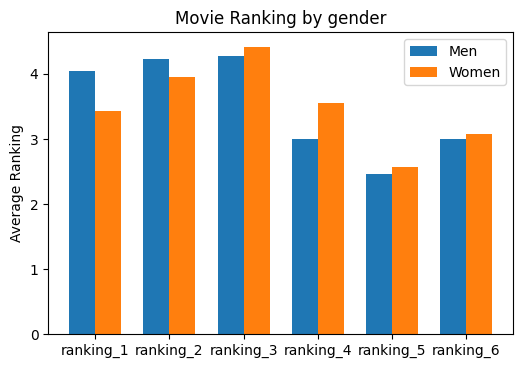

In [22]:
#plotting the graph 
labels = ['ranking_1', 'ranking_2', 'ranking_3',
          'ranking_4', 'ranking_5', 'ranking_6']
x = np.arange(len(labels))
width = .35


fig, ax = plt.subplots()
ax.bar(x - width/2, ranking_m, width, label='Men')
ax.bar(x + width/2, ranking_f, width, label='Women')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Ranking')
ax.set_title('Movie Ranking by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

From the plot, we realize that most of the rankings came from the men. However, for the most ranked movie of ranking_3, the women contributed the highest to this ranking. This therefore mean the highest ranked movie had most of it ranking form women.

In [24]:
#analyzing by segment (seen)
seen_m = male[male.columns[3:9]].mean()
seen_f = female[female.columns[3:9]].mean()

print("Males Average Seen:\n", seen_m.sort_values())
print("\nFemales Average Seenn", seen_f.sort_values())

Males Average Seen:
 seen_3    0.637827
seen_2    0.649899
seen_4    0.688129
seen_1    0.726358
seen_6    0.778672
seen_5    0.788732
dtype: float64

Females Average Seenn seen_3    0.404372
seen_2    0.431694
seen_4    0.464481
seen_1    0.542805
seen_6    0.615665
seen_5    0.642987
dtype: float64


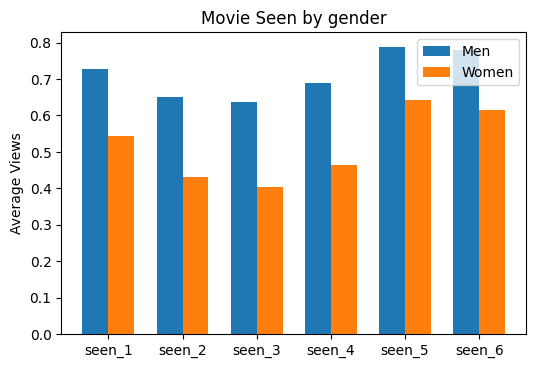

In [29]:
labels = ['seen_1', 'seen_2', 'seen_3',
          'seen_4', 'seen_5', 'seen_6']
x = np.arange(len(labels))
width = .35


fig, ax = plt.subplots()
ax.bar(x - width/2, seen_m, width, label='Men')
ax.bar(x + width/2, seen_f, width, label='Women')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Views')
ax.set_title('Movie Seen by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

As expected, most star_wars movies were watched by males.

# Conclusion: 

* There are more males than females who watched the Star Wars in all the surveyed sequels ; there is no significant difference in the orders of the most-viewed episodess.

* The ranking orders is very similar in males and females, however, there is more distinct differences in average ranking scores for female group than those of the males group.

* Males and females mean scores for each each sequel are close except sequel 1 and 4, it appears that women scored sequel 1 better than men did, while men scored sequel 4 better than women did.